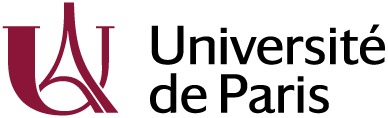
# Programmation avancée - Lab 6 - Modules, Lists, Datastructures
## Sylvain Lobry, 23/10/2023

## Exercice 1 - Distance
Write a function dist that computes the Minkowski distance of order `p` between two `n`-dimensional points (given as `n`-dimensional tuples). As a reminder, the Minkowski ditance between two points `X` and `Y` is defined as:
.

Therefore, your function `dist` takes two tuples as argument and the norm `p`, defaulting to 2 (Euclidian distance). To create this function, only use the [pow](https://docs.python.org/3/library/math.html#math.pow) function from the module math.

*Example*
```
>> dist((0,0,0), (3,42,3), 100)
42.0
```

In [3]:
import math

def dist(X, Y, p=2):
    """Compute Minkowski distance.

    Args:
        X (tuple): tuple that contains coordinates of X point. Can be 1-,2-,3-D, etc. coordinates.
        Y (tuple): tuple that contains coordinates of Y point. Can be 1-,2-,3-D, etc. coordinates.
        p (int, optional): norm. Defaults to 2.
    """

    minkowski_distance = math.pow(sum(math.pow(abs(x-y), p) for x, y in zip(X,Y)), 1/p)

    return minkowski_distance

dist((0,0,0), (3,42,3), 100)

42.0

In [1]:
X = (0,0,0);  Y= (3,42,3)
for x,y in zip(X,Y):
    print(x,y)

0 3
0 42
0 3


## Exercise 2 -  One line distribution
Using the [random](https://docs.python.org/3/library/random.html) function in the random module, write in one line an expression giving a list of 100 random floats between 1 and 1000:

In [8]:
import random

random_floats = [random.uniform(1,1000) for _ in range(100)] # _ is a throwaway variable
print(len(random_floats))
print(random_floats)

100
[435.5695271339852, 734.468040787261, 663.8616507850744, 787.8303753505414, 75.71695279900455, 361.6498128902672, 610.7460744090425, 10.135341232033642, 169.8033518506271, 636.474652693292, 745.9258739364683, 570.0724285859023, 563.5212841001415, 931.5916263723163, 723.492669208874, 753.0793677453773, 926.7284489192363, 927.973657276076, 151.53327359414482, 316.4058811195513, 791.4844273128208, 224.75052227501325, 475.77432459847273, 61.363693348636886, 184.60042511075724, 36.777618621086, 383.7596033139269, 915.0926111639889, 56.00619824970216, 361.3076802935749, 142.11541671073385, 845.5640600172725, 336.5617720243575, 382.2871549369414, 580.7840078479899, 735.1440289110751, 808.9033856865616, 586.5188453896135, 408.22700781449606, 562.2216821563544, 347.37815408581844, 959.2989195094502, 939.2687135799969, 87.62055694420283, 964.3998333404234, 594.6033634669054, 655.080294424016, 163.11152232676352, 835.944312200979, 716.5983038006141, 139.6568354217003, 641.9230842280483, 426.0

## Exercise 3 - Unique values
Write a function `unique_val` which given a dictionnary as input, prints all of the values exactly once (i.e. if a value is a duplicate, it is only printed once).
Try to write it as it feels the easiest for you. Once this is done and it works, try to write it in one line.

*Example*
```
>> unique_val({1: 2, 3: 2, 4:3, 5:1})
{1, 2, 3}
```

In [8]:
def unique_val(my_dict):

    my_values = my_dict.values() # get all the values of my_dict
    unique_values = set(my_values) # set my_values in a set to get unique values
    print(unique_values) 

unique_val({1:2, 3:2, 4:3, 5:1})

{1, 2, 3}


## Exercise 4 - Inversion of a dictionary
Write a function `invert` which takes a dictionary as an input and return a dictionary where the values of the original dictionary are the keys and the keys of the original dictionary are the values. When a value is present more than once, the value associated to this key in the new dictionary should be a list. If it is present once, it should only be the original element.

*Example*
```
>> invert({1:"a", 2:"b", 3:"a", 4:"c", 5:"d", 6:"c"})
{'a': [1, 3], 'b': 2, 'c': [4, 6], 'd': 5}
```

In [23]:
def invert(my_dict):

    # create a new dictionary
    my_dict_inverted = {}

    # iterate over my_dict
    for key, value in my_dict.items():
        if value in my_dict_inverted: #if the value alreadt exists in the my_dict_inverted
            if not type(my_dict_inverted[value]) == list: # check if the value is not already in list format
                my_dict_inverted[value] = [my_dict_inverted[value]]
            
            my_dict_inverted[value].append(key) # append the new key inside the dict
                
        else:
            my_dict_inverted[value] = key #create a key using value and associate key as value

    return my_dict_inverted
    
print(invert({1:"a", 2:"b", 3:"a", 4:"c", 5:"d", 6:"c"}))


{'a': [1, 3], 'b': 2, 'c': [4, 6], 'd': 5}


## Exercise 5 - Split to files

Write a function `split_to_files` which takes a string and a folder as an input. If the folder does not exist, it should create it (check in the lecture to see which function to use). In this folder, it will write one file per word of the string. These files will be named **1.txt**, **2.txt**, ...

You should use the module [os](https://docs.python.org/3/library/os.html).

*Example*
```
>> split_to_files("Bonjour a tous", "test_lab3")
>> exit()
> ls test_lab3
0.txt 1.txt 2.txt
> cat test_lab3/0.txt
Bonjour
```

In [24]:
import os
from os.path import exists, join

def split_to_files(text, folder):

    # check if the folder exists
    if not exists(folder):
        os.makedirs(folder)

    # split the text and get a list of words
    words = text.split()

    # use enumerate to iterate over the list of words
    for i, word in enumerate(words): #it creates the i automatically
        with open(join(folder, f"{i+1}.txt"), "w") as f: #create the file using "write" access mode
            f.write(word)#write the word in the file


# call the function
split_to_files("Bonjour a tous", "test_lab3")        
    